# Random Forest Classifier

In [ ]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
print(tf. __version__)


RANDOM_SEED = 42

In [20]:
df.shape

(21723, 43)

In [44]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example: load your dataset (replace this with actual data)
data = np.loadtxt("final_keypoint_dataset.csv", delimiter=',')  # shape: (n_samples, 43)

# Split into features and labels
y = data[:, 0].astype(int)      # First column as target
X = data[:, 1:].astype(float)   # Remaining columns as features

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.9975, random_state=42
)

# Define and train the model
clf = RandomForestClassifier(n_estimators=43, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc}")


Accuracy: 0.5787263497923396


(21724,)

# CNN

In [25]:
import shutil

shutil.rmtree("asl_dataset")


In [28]:
import zipfile

with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')


In [29]:
import os
import shutil
import string

data_dir = "/content/asl_dataset"
valid_dirs = set(string.ascii_uppercase)  # {'A', 'B', ..., 'Z'}

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path) and folder.upper() not in valid_dirs:
        print(f"Deleting: {folder_path}")
        shutil.rmtree(folder_path)


Deleting: /content/asl_dataset/2
Deleting: /content/asl_dataset/9
Deleting: /content/asl_dataset/0
Deleting: /content/asl_dataset/7
Deleting: /content/asl_dataset/5
Deleting: /content/asl_dataset/3
Deleting: /content/asl_dataset/1
Deleting: /content/asl_dataset/4
Deleting: /content/asl_dataset/6
Deleting: /content/asl_dataset/asl_dataset
Deleting: /content/asl_dataset/8


In [45]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os

# Set parameters
img_height, img_width = 64, 64  # You can adjust based on your image size
batch_size = 32
data_dir = "/content/asl_dataset"

# Load dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'  # for multi-class classification
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Define CNN model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(26, activation='softmax')  # number of classes
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# Save model
model.save("asl_cnn_model.h5")


Found 1815 files belonging to 26 classes.
Using 1452 files for training.
Found 1815 files belonging to 26 classes.
Using 363 files for validation.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.2664 - loss: 2.6324 - val_accuracy: 0.7438 - val_loss: 0.7463
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8400 - loss: 0.4615 - val_accuracy: 0.9174 - val_loss: 0.2307
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9539 - loss: 0.1337 - val_accuracy: 0.9642 - val_loss: 0.1154
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9823 - loss: 0.0594 - val_accuracy: 0.9587 - val_loss: 0.1193
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9848 - loss: 0.0395 - val_accuracy: 0.9835 - val_loss: 0.0717
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9957 - loss: 0.0171 - val_accuracy: 0.9642 - val_loss: 0.0909
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9942 - loss: 0.0274 - val_accuracy: 0.9669 - val_loss: 0.1043
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9986 - loss: 0.0128 - val_accuracy: 0.9477 - val_loss: 0.

In [46]:
# Save model as TFLite instead of .h5
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save to file
with open("asl_cnn_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model saved as asl_cnn_model.tflite")

Saved artifact at '/tmp/tmp905551x4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='keras_tensor_29')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  140555018675856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140555018677584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140554686107088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140554686106896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140554686105936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140554686104976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140554686107856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140554686104208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140554686104784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140554686107472: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model saved as

# Final Model

In [2]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
print(tf. __version__)


RANDOM_SEED = 42

2.18.0


## Specify each path

In [4]:
path = '/content/final_keypoint_dataset.csv'
model_save_path = 'model/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier.tflite'
tfjs_save_path = 'model/keypoint_classifier/tfjs_model'

## Set number of classes

In [5]:
NUM_CLASSES = 26

## Dataset reading

In [6]:
df = pd.read_csv(path)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.0,0.0,0.0,0.232804,-0.206349,0.370370,-0.502646,0.407407,-0.793651,0.465608,...,-0.074074,-0.280423,-0.195767,-0.539683,-0.275132,-0.629630,-0.243386,-0.470899,-0.185185,-0.349206
1,0.0,0.0,0.0,-0.297468,-0.151899,-0.481013,-0.506329,-0.531646,-0.791139,-0.594937,...,0.006329,-0.291139,0.227848,-0.601266,0.234177,-0.715190,0.189873,-0.525316,0.145570,-0.392405
2,0.0,0.0,0.0,-0.316062,-0.160622,-0.466321,-0.497409,-0.476684,-0.787565,-0.538860,...,-0.036269,-0.295337,0.284974,-0.637306,0.155440,-0.766839,0.098446,-0.559585,0.103627,-0.414508
3,0.0,0.0,0.0,-0.273973,-0.205479,-0.390411,-0.513699,-0.383562,-0.773973,-0.410959,...,-0.047945,-0.294521,0.273973,-0.671233,0.041096,-0.780822,0.020548,-0.595890,0.082192,-0.465753
4,0.0,0.0,0.0,-0.298780,-0.189024,-0.445122,-0.512195,-0.469512,-0.780488,-0.524390,...,-0.042683,-0.292683,0.274390,-0.646341,0.091463,-0.768293,0.048780,-0.573171,0.073171,-0.420732


In [7]:
df.rename(columns={df.columns[0]: "label"}, inplace=True)

In [8]:
X = df.drop("label", axis=1).values
y = df["label"].values

In [9]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into train/val/test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [11]:
df.columns

Index(['label', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42'],
      dtype='object')

In [12]:
X_dataset = np.loadtxt(path, delimiter=',', dtype='float32', usecols=range(1, 43), skiprows=1)


In [13]:
X_dataset.shape

(21723, 42)

In [14]:
y_dataset = np.loadtxt(path, delimiter=',', dtype='int32', usecols=(0,), skiprows=1)

<ipython-input-14-810c31791c76>:1: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  y_dataset = np.loadtxt(path, delimiter=',', dtype='int32', usecols=(0,), skiprows=1)


In [15]:
y_dataset

array([ 0,  0,  0, ..., 25, 25, 25], dtype=int32)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

## Model building

In [17]:
# Neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')  # 26 classes for A-Z
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [18]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        11,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,850 (210.35 KB)

 Trainable params: 53,850 (210.35 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [23]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Model training

In [24]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=128)


Epoch 1/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.2084 - loss: 2.6926 - val_accuracy: 0.8892 - val_loss: 0.7245
Epoch 2/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7431 - loss: 0.7879 - val_accuracy: 0.9125 - val_loss: 0.3270
Epoch 3/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8830 - loss: 0.4078 - val_accuracy: 0.9619 - val_loss: 0.2053
Epoch 4/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9182 - loss: 0.3102 - val_accuracy: 0.9729 - val_loss: 0.1595
Epoch 5/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9444 - loss: 0.2365 - val_accuracy: 0.9643 - val_loss: 0.1527
Epoch 6/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9533 - loss: 0.1897 - val_accuracy: 0.9740 - val_loss: 0.1362
Epoch 7/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9603 - loss: 0.1599 - val_accuracy: 0.9783 - val_loss: 0.1234
Epoch 8/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9692 - loss: 0.1550 - val_accuracy: 0

In [ ]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9918 - loss: 0.0345


In [ ]:
# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open("asl_model.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpoyvn5tty'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  134649024212304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134649024213648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134649024215760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134649024213264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134649024213072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134649024216912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134649024216720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134649024216336: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
[1.56216491e-02 0.00000000e+00 0.00000000e+00 5.53320054e-18
 4.61138290e-04 7.06142966e-33 1.62935841e-33 1.91515018e-18
 1.82711311e-12 1.37649704e-19 2.94016027e-05 6.96101438e-07
 6.68183155e-03 2.01018248e-03 3.06672223e-19 1.13794056e-04
 1.26794119e-15 8.75526553e-07 9.66097593e-01 8.97787977e-03
 1.55905866e-08 4.82601830e-24 2.68641979e-18 2.20442212e-06
 2.80772474e-06 4.83779731e-31]
18


## Confusion matrix

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


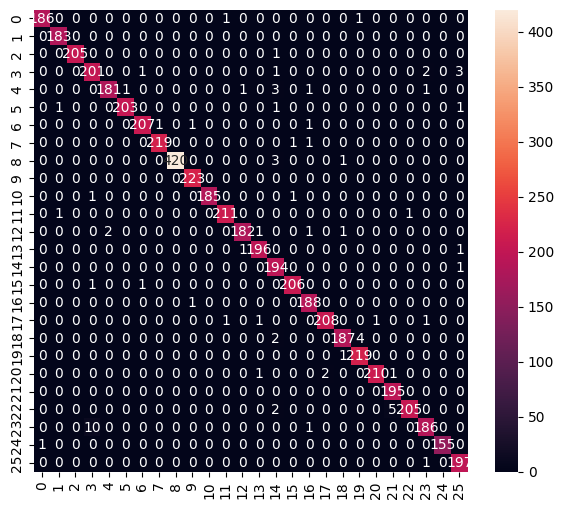

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       188
           1       0.99      1.00      0.99       183
           2       1.00      1.00      1.00       206
           3       0.94      0.97      0.95       208
           4       0.99      0.96      0.98       188
           5       1.00      0.99      0.99       206
           6       0.99      0.99      0.99       210
           7       1.00      0.99      0.99       221
           8       1.00      0.99      1.00       424
           9       0.99      1.00      1.00       223
          10       1.00      0.99      0.99       187
          11       0.99      0.99      0.99       213
          12       0.99      0.97      0.98       187
          13       0.98      0.99      0.99       198
          14       0.94      0.99      0.97       195
          15       0.99      0.99      0.99       208
          16       0.97      0.99      0.98       189
     

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

## Convert to model for Tensorflow-Lite

In [ ]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

Saved artifact at '/tmp/tmpravlb5fh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  132552622148496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132552622156368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132552622152528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132552622154256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132552622150416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132552622150224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132552622150992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132552622151760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132552622152720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132552622149648: TensorSpec(shape=(), dtype=tf.resource, name=None)


26064

In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model,tfjs_save_path)

## Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 565 µs, sys: 43 µs, total: 608 µs
Wall time: 473 µs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.4592178e-02 0.0000000e+00 0.0000000e+00 1.4811987e-17 8.6899434e-04
 4.9498839e-32 8.1378159e-33 4.3532841e-18 2.8105925e-12 3.1748608e-19
 3.2930580e-05 1.1014012e-06 8.4570991e-03 3.1888720e-03 9.9259109e-19
 1.3189716e-04 2.9479440e-15 1.5426650e-06 9.6249801e-01 1.0220131e-02
 3.1314265e-08 2.3326380e-23 6.9900451e-18 4.0980754e-06 3.0806066e-06
 3.7215786e-30]
18


In [ ]:
import tensorflow as tf
import numpy as np

# Load the model
model_path = 'model/keypoint_classifier/keypoint_classifier.keras'
model = tf.keras.models.load_model(model_path)

# Sample input data
sample_input_str = "0,0.0,0.0,-0.13777777777777778,-0.17333333333333334,-0.38222222222222224,-0.24,-0.6133333333333333,-0.18666666666666668,-0.7688888888888888,-0.10666666666666667,-0.4,-0.4444444444444444,-0.7066666666666667,-0.3288888888888889,-0.8755555555555555,-0.24444444444444444,-1.0,-0.19555555555555557,-0.4,-0.37777777777777777,-0.7288888888888889,-0.1688888888888889,-0.6222222222222222,-0.08888888888888889,-0.5288888888888889,-0.10666666666666667,-0.40444444444444444,-0.26222222222222225,-0.6755555555555556,-0.04888888888888889,-0.56,0.013333333333333334,-0.4711111111111111,-0.022222222222222223,-0.4088888888888889,-0.1288888888888889,-0.5777777777777777,0.057777777777777775,-0.48444444444444446,0.09777777777777778,-0.40444444444444444,0.057777777777777775"

# Convert string to float array and remove the first item (likely an ID or label)
float_values = [float(x) for x in sample_input_str.split(',')[1:]]  # Skip the first value

# Ensure correct shape
sample_input = np.array(float_values).reshape(1, -1)

# Predict
predictions = model.predict(sample_input)
predicted_class = np.argmax(predictions, axis=1)[0]

print(f"Predicted class index: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
Predicted class index: 6


# dummy


In [48]:
import os

data_dir = "/content/asl_dataset"

for folder_name in sorted(os.listdir(data_dir)):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        print(f"{folder_name}: {num_files} files")


a: 70 files
b: 70 files
c: 70 files
d: 70 files
e: 70 files
f: 70 files
g: 70 files
h: 70 files
i: 70 files
j: 70 files
k: 70 files
l: 70 files
m: 70 files
n: 70 files
o: 70 files
p: 70 files
q: 70 files
r: 70 files
s: 70 files
t: 65 files
u: 70 files
v: 70 files
w: 70 files
x: 70 files
y: 70 files
z: 70 files
